In [1]:
import os
import cv2
import numpy as np
import pandas as ps
import seaborn as sns
import matplotlib.pyplot as plt

import keras
import tensorflow

from keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.layers.wrappers import TimeDistributed
from keras.layers import LSTM

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [2]:
train_path = "../input/datasetcorr/datasetSegCorr/train/"
test_path = "../input/datasetcorr/datasetSegCorr/test/"

In [3]:
size = (128, 128)

In [4]:
def imageArray(path, size):
    data = []
    Totalnb = 0
    label = []
    i = 0
    sList = os.listdir(path)
    sList.sort
    for d in sList:
        sub_dir = path + d
        nb = 0        
        #if d not in ['ji!-', "d'!-", 'u---', 'Ga-!', 'i---', 'r--']:
        for sd in os.listdir(sub_dir):
            sub_sub_dir = sub_dir + "/" + sd
            tmp = []
            count = 0

            liste = os.listdir(sub_sub_dir)
            for img in liste:
                if count < 12:
                    image_path = sub_sub_dir + "/" + img
                    img_array = cv2.imread(image_path)
                    img_array = cv2.resize(img_array, dsize=size)
                    #print(img_array.shape)
                    count += 1

                    tmp.append(img_array)
                else :
                    break
            if len(tmp) == 16 or len(tmp) == 12:
                #print(np.array(tmp).shape)
                nb += 1
                label.append([d, i])
                data.append(tmp)
                #print(np.array(data).shape)
            else:
                print(d, sd, len(liste))
        if nb != 0:
            i += 1
            #print(d,"Label number of Dataset is:",nb)
            Totalnb = Totalnb + nb
    #print("Total Number of Data is",Totalnb)    
    return data, label, Totalnb

In [5]:
train, train_label, train_totalnb = imageArray(train_path, size)

In [6]:
test, test_label, test_totalnb = imageArray(test_path, size)

In [7]:
x_train = np.array(train)
x_test = np.array(test)

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [10]:
print(x_train.shape, train_label.shape)
print(x_test.shape, test_label.shape)

(41, 12, 128, 128, 3) (41, 2)
(12, 12, 128, 128, 3) (12, 2)


In [17]:
def getLabel(label, total, size):
    # shuffling dataset for input fit function
    # if don`t, can`t train model entirely
    print(label.shape)
    label = np.eye(3)[label] 
    print(label.shape)
    x = np.arange(label.shape[0])
    np.random.shuffle(x)
    # same order shuffle is needed
    label = label[x]

    # declare data for training and validation, if you want, you can seperate testset from this
    y = label[0:total]
    return y

In [18]:
train_label[:,1]

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2'], dtype='<U21')

In [11]:
y_train = np.eye(3)[train_label[:,1].astype(int)]
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [12]:
y_test = test_label[0:,1]
y_test.shape

(12,)

In [21]:
test_label[:,1]

array(['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2'],
      dtype='<U21')

In [13]:
y_test

array(['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2'],
      dtype='<U21')

In [ ]:
#y_test = getLabel(test_label[:,1].astype(int), test_totalnb, np.unique(test_label[:,1].astype(int)).shape[0])
#y_train = getLabel(train_label[:,1].astype(int), train_totalnb, np.unique(train_label[:,1].astype(int)).shape[0])

In [ ]:
i = 0
for seq in train:
    for img in seq:
        print(train_label[i][0])
        if train_label[i][1].astype(int) == 1:
            #plt.title(test_label[i])
            plt.imshow(img)
            plt.show()
    i=i+1

**2D VGG19**

In [19]:
vgg = VGG19(input_shape = (128, 128, 3), weights = "imagenet", include_top = False)

2022-09-02 23:12:23.142863: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 23:12:23.275488: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 23:12:23.276331: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-02 23:12:23.277602: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 0s 0us/step


In [20]:
vgg.trainable = False

In [28]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [21]:
x = Flatten()(vgg.output)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
cnn_out = Dense(128, activation = "relu")(x)

In [22]:
lstm_inp = Model(inputs = vgg.input, outputs = cnn_out)

In [23]:
video = Input(shape=(None,128,128,3))

In [24]:
# Distribute CNN output by timesteps 
encoded_frames = TimeDistributed(lstm_inp)(video)

In [25]:
# Contruct LSTM model 
encoded_sequence = LSTM(256)(encoded_frames)
hidden_Drop = Dropout(0.3)(encoded_sequence)
hidden_layer = Dense(128, activation="relu")(hidden_Drop)
outputs = Dense(3, activation="softmax")(hidden_layer)

In [26]:
# Contruct CNN+LSTM model 
model = Model([video], outputs)

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, 128, 128, 3 0         
_________________________________________________________________
time_distributed (TimeDistri (None, None, 128)         28545216  
_________________________________________________________________
lstm (LSTM)                  (None, 256)               394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 28,972,739
Trainable params: 8,948,355
Non-trainable params: 20,024,384
_______________________________________

In [28]:
# Model Compile 
adam = tensorflow.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
#batch = 10 epoch = 1000 train 100% and test 58%
#batch = 32 epoch = 1000 train 100% and test 58%
hist = model.fit(x_train, y_train, 
                 validation_split=0.2,
                 batch_size=10, 
                 shuffle=True, 
                 epochs=1500)

2022-09-02 23:13:00.330722: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/1500


2022-09-02 23:13:03.190829: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


4/4 [==============================] - 18s 2s/step - loss: 1.0938 - accuracy: 0.3750 - val_loss: 1.5006 - val_accuracy: 0.0000e+00
Epoch 2/1500
4/4 [==============================] - 0s 107ms/step - loss: 0.9871 - accuracy: 0.5938 - val_loss: 1.7018 - val_accuracy: 0.0000e+00
Epoch 3/1500
4/4 [==============================] - 0s 108ms/step - loss: 0.9917 - accuracy: 0.4375 - val_loss: 1.8633 - val_accuracy: 0.0000e+00
Epoch 4/1500
4/4 [==============================] - 0s 107ms/step - loss: 1.0624 - accuracy: 0.3750 - val_loss: 1.9877 - val_accuracy: 0.0000e+00
Epoch 5/1500
4/4 [==============================] - 0s 105ms/step - loss: 0.9870 - accuracy: 0.4375 - val_loss: 2.0969 - val_accuracy: 0.0000e+00
Epoch 6/1500
4/4 [==============================] - 0s 107ms/step - loss: 0.9597 - accuracy: 0.5938 - val_loss: 2.2638 - val_accuracy: 0.0000e+00
Epoch 7/1500
4/4 [==============================] - 0s 104ms/step - loss: 0.9716 - accuracy: 0.5625 - val_loss: 2.2804 - val_accuracy: 0.00

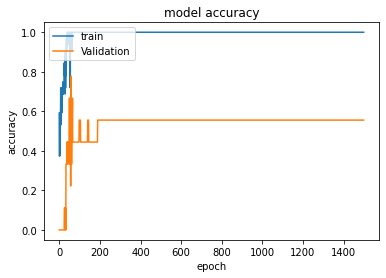

In [30]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

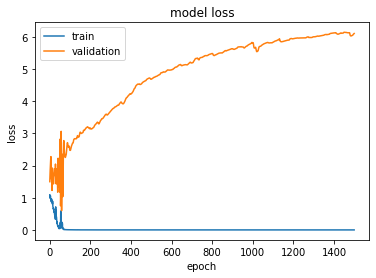

In [31]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
test = model.predict(x_test)

In [33]:
y_classes = test.argmax(axis=1)
y_classes

array([0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2])

In [36]:
for i in range(12):
    print(y_classes[i], y_test[i])

0 0
0 0
0 0
0 0
2 1
2 1
1 1
2 1
0 2
2 2
2 2
2 2


In [37]:
from sklearn.metrics import classification_report

In [ ]:
y_true = []
for i in y_test:
    n = np.where(i==1)
    y_true.append(int(n[0]))
y_true

In [38]:
gg = y_test.astype(int)==y_classes
test_set_accuracy = np.mean(gg)
test_set_accuracy

0.6666666666666666

In [39]:
print(classification_report(y_test.astype(int), y_classes, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.25      0.40         4
           2       0.50      0.75      0.60         4

    accuracy                           0.67        12
   macro avg       0.77      0.67      0.63        12
weighted avg       0.77      0.67      0.63        12



In [42]:
temp = []
for s in y_classes:
    if s == 0:temp.append("u!--")
    elif s == 1: temp.append("i!--")
    elif s == 2: temp.append("a!--")
temp

['u!--',
 'u!--',
 'u!--',
 'u!--',
 'a!--',
 'a!--',
 'i!--',
 'a!--',
 'u!--',
 'a!--',
 'a!--',
 'a!--']

In [40]:
from sklearn.metrics import confusion_matrix

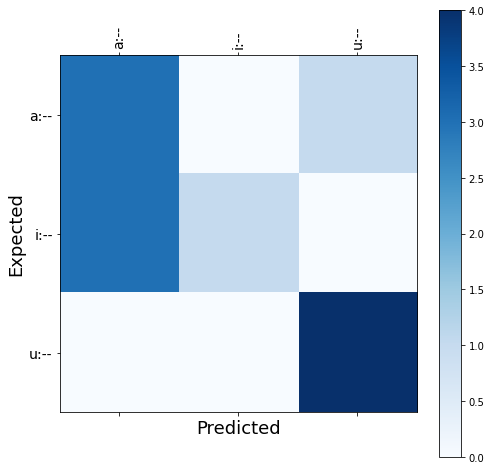

In [43]:
conf_mat = confusion_matrix(y_true=test_label[:,0], y_pred=temp)

fig = plt.figure(figsize=(8,8))
plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=fig.number)
plt.colorbar()
plt.xticks(np.arange(3), ["a:--", "i:--", "u:--"], rotation=90, fontsize=14)
plt.yticks(np.arange(3), ["a:--", "i:--", "u:--"], fontsize=14)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Expected', fontsize=18)
plt.show()